<h1>LAB NUMBER 1</h1>

<h2>IMPORTING THE REQUIRED LIBRARIES</h2>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import simplefilter
from pandas.core.common import SettingWithCopyWarning

simplefilter(action = "ignore", category = SettingWithCopyWarning)

<h2>ENABLE THE PROPERTIE OF PANDAS TO SEE ALL THE COLUMNS DISPLAYING DATAFRAMES</h2>

In [3]:
pd.set_option('display.max_columns', None)

<h2>IMPORTING THE DATA</h2>

In [4]:
def import_data(path):
    dataframe = pd.read_csv(path)
    return dataframe

customer_df = import_data('files_for_lab/customer_data.csv')

<h2>DISPLAYING THE INFO OF ALL THE COLUMNS OF THE DATAFRAME</h2>

In [5]:
print(customer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

<h2>DISPLAYING THE SHAPE OF THE DATAFRAME</h2>

In [6]:
print(f'DATAFRAME SHAPE: {customer_df.shape}\n')

DATAFRAME SHAPE: (9134, 24)



<h2>DISPLAYING THE FIRST ROWS</h2>

In [7]:
customer_df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


<h2>NORMALIZING THE NAME OF THE COLUMNS TO THE SNAKE CASE</h2>

In [8]:
def snake_case_columns(dataframe):

    snake_columns = list()

    for column in dataframe.columns:
        column = column.replace(' ', '_')
        column = column.lower()
        snake_columns.append(column)

    dataframe.columns = snake_columns

    return dataframe

customer_df = snake_case_columns(customer_df)

<h2>CONVERTING THE EFFECTIVE TO DATE COLUMN TO A DATETIME COLUMN</h2>

In [9]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

<h2>DISPLAYING THE NAN VALUES OF THE DATAFRAME</h2>

In [10]:
print('\nNAN VALUES IN THE DATAFRAME\n')
customer_df.isna().sum()


NAN VALUES IN THE DATAFRAME



customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

<h2>SPLITTING THE NUMERICAL, CATEGORICAL AND DISCRETE COLUMNS IN THREE DATAFRAMES</h2>

In [11]:
def numerical_discrete_categorical(dataframe):

    categorical = dataframe.select_dtypes(include = object).columns.to_list()
    numerical = list()
    discrete = list()

    for column in dataframe.select_dtypes(include = np.number).columns:
        if len(dataframe[column].unique()) < 10:
            discrete.append(column)
        else:
            numerical.append(column)

    return categorical, numerical, discrete

categories, numbers, discretes = numerical_discrete_categorical(customer_df)

customer_df_categories = customer_df[categories]
customer_df_numerical = customer_df[numbers]
customer_df_discretes = customer_df[discretes]
customer_df_datetime = customer_df[['effective_to_date']]

<h2>SPLITTING THE POLICY TYPE COLUMN IN TWO COLUMNS</h2>

In [12]:
policy_categorie = list()
policy_code = list()

for policy in customer_df_categories['policy'].values:
    policy_values = policy.split()
    policy_categorie.append(policy_values[0])
    policy_code.append(policy_values[1])

customer_df_categories['policy_categorie'] = policy_categorie
customer_df_categories['policy_code'] = policy_code
customer_df_categories = customer_df_categories.drop('policy', axis = 1)

<h2>JOINING CATEGORICAL AND DISCRETE COLUMNS IN ONE UNIQUE DATAFRAME</h2>

In [13]:
customer_df_categorical_discrete = pd.concat([customer_df_categories, customer_df_discretes], axis = 1)

<h2>CUSTOMER ID CONCLUSION</h2>

<h3>CUSTOMER ID IS POSSIBLY THE CAR IDENTIFIER, SO IS A GOOD IDEA TO STORE THAT COLUMN IN A SINGLE VARIABLE TO USE IT LATER AFTER THE CLEANING AND THE PREPROCESSING PROCESSES</h3>

-----------------------------------------------------------------------------------------------

<h1>LAB NUMBER 2</h1>

<h2>CONCATING THE CONTINUOUS AND DISCRETE DATA AND SHOWING A CORRELATION MATRIX</h2>

In [14]:
customer_df_number_discrete = pd.concat([customer_df_numerical, customer_df_discretes], axis = 1)

<h2>CORRELATION MATRIX BETWEEN THE NUMERICAL AND DISCRETE COLUMNS</h2>

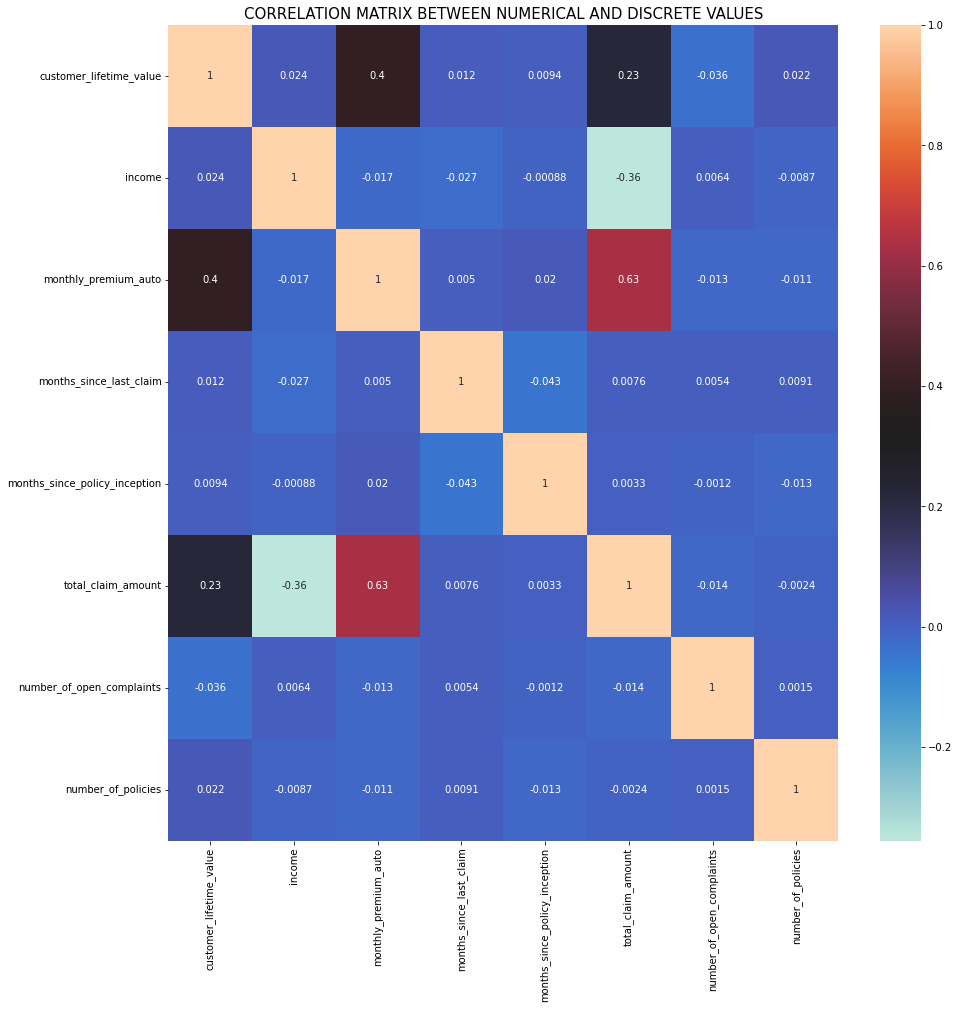

In [15]:
fig = plt.figure(figsize = (15, 15))
sns.heatmap(customer_df_number_discrete.corr(), annot = True, cmap = 'icefire')
plt.title('CORRELATION MATRIX BETWEEN NUMERICAL AND DISCRETE VALUES', fontsize = 15)
plt.show()

<h2>PLOTTING THE CATEGORICAL AND DISCRETE FEATURES</h2>

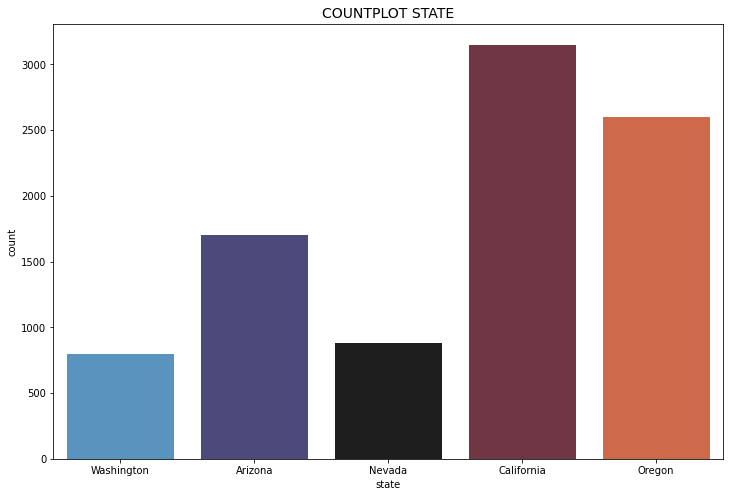

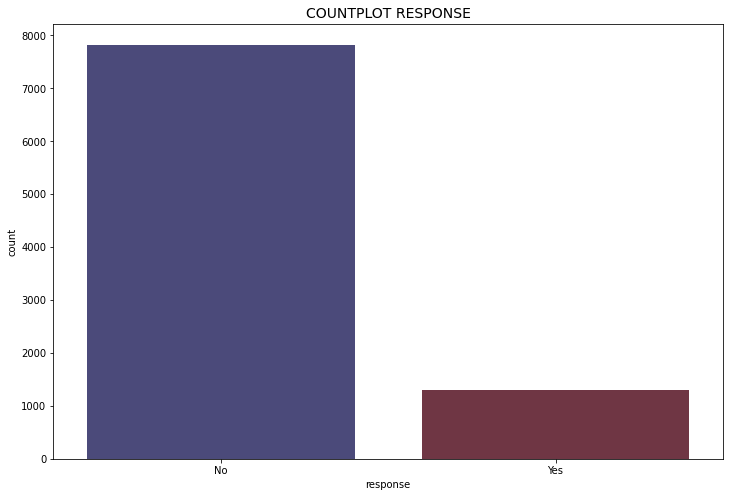

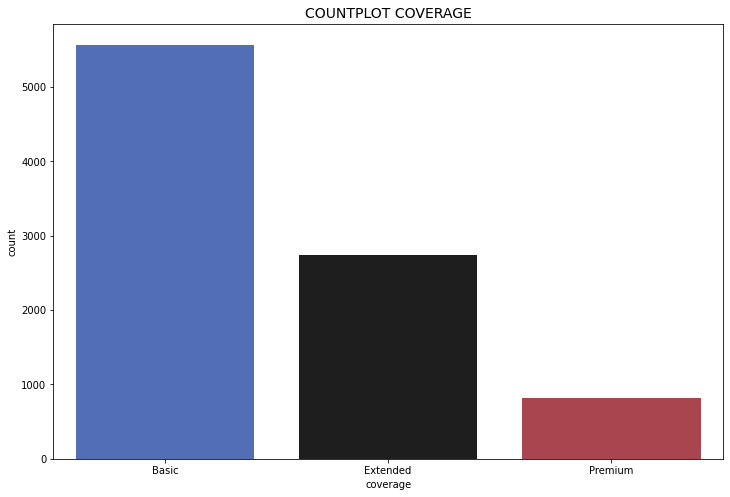

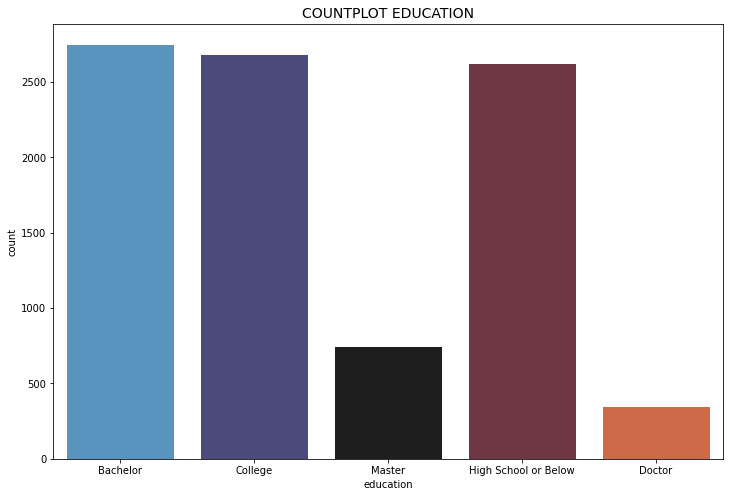

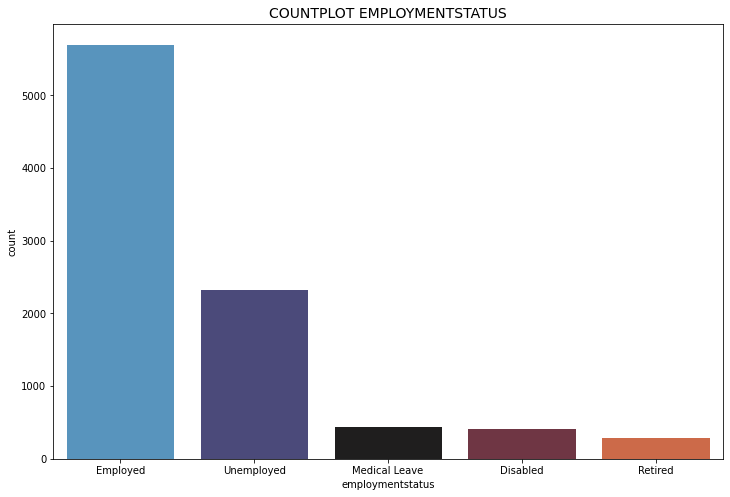

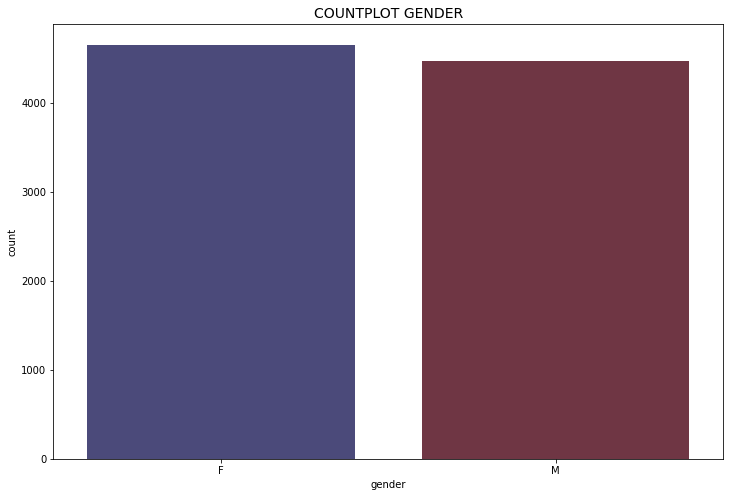

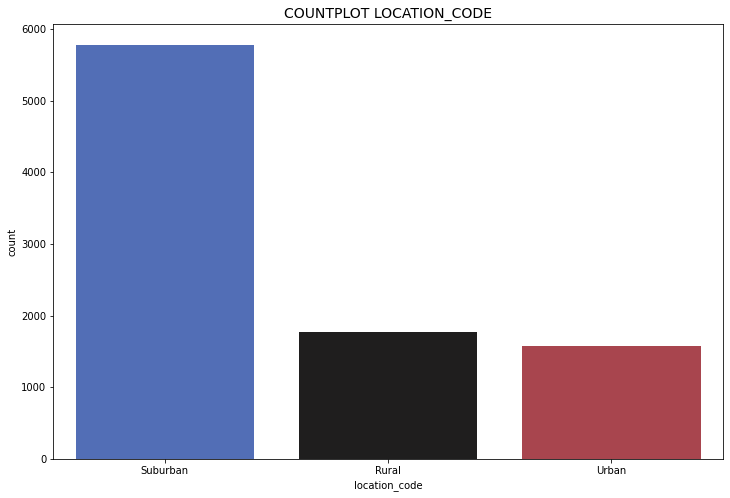

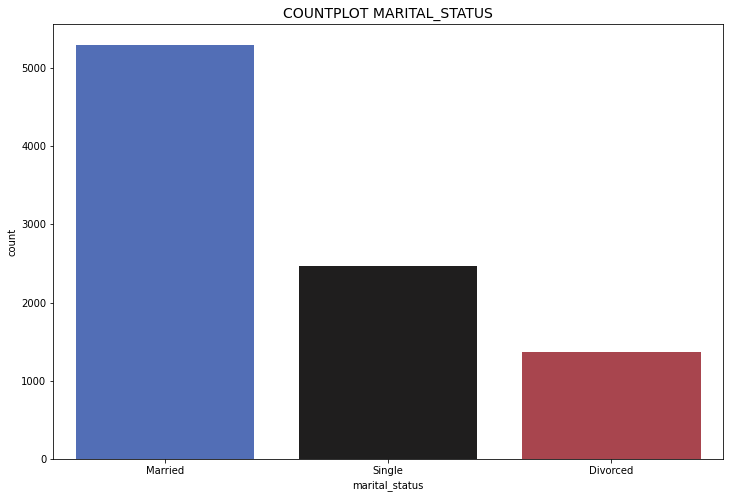

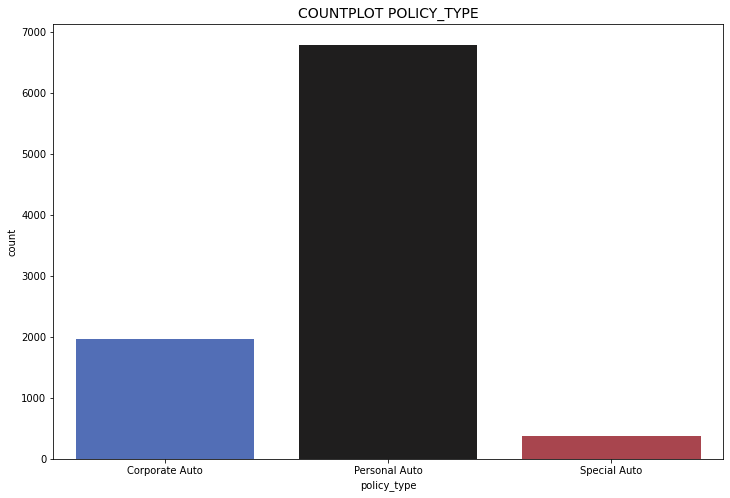

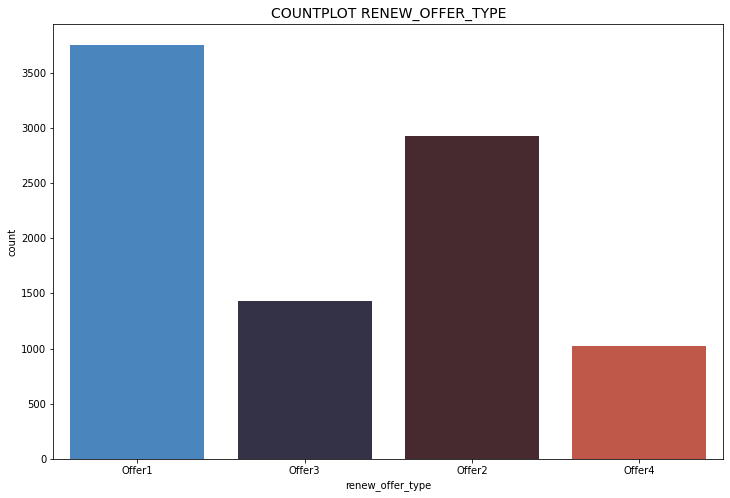

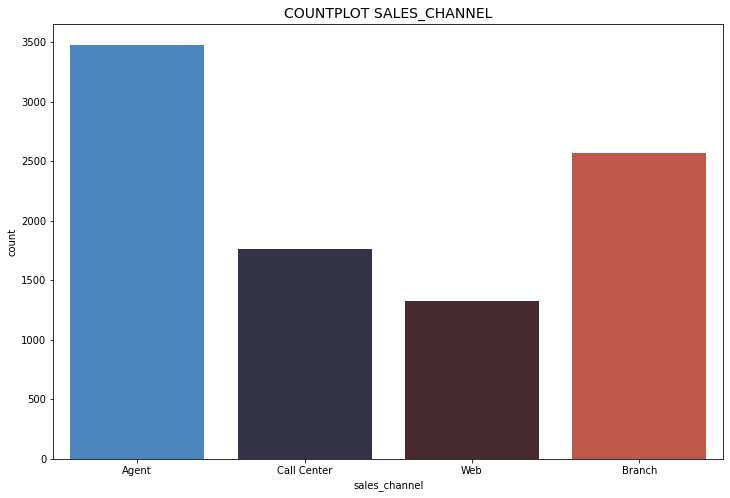

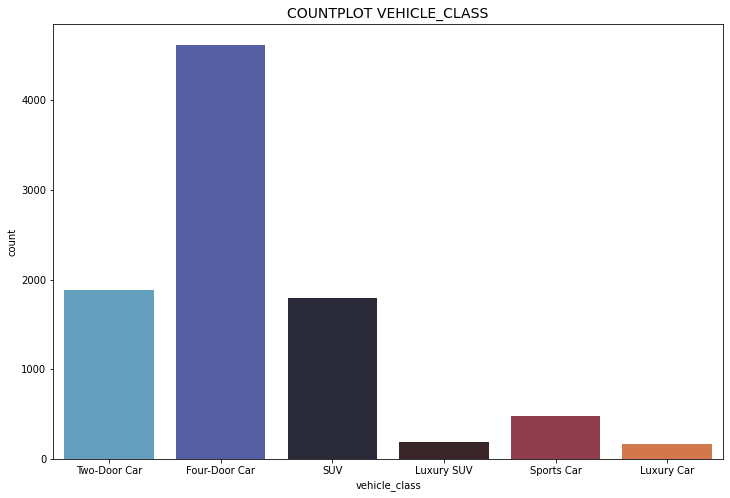

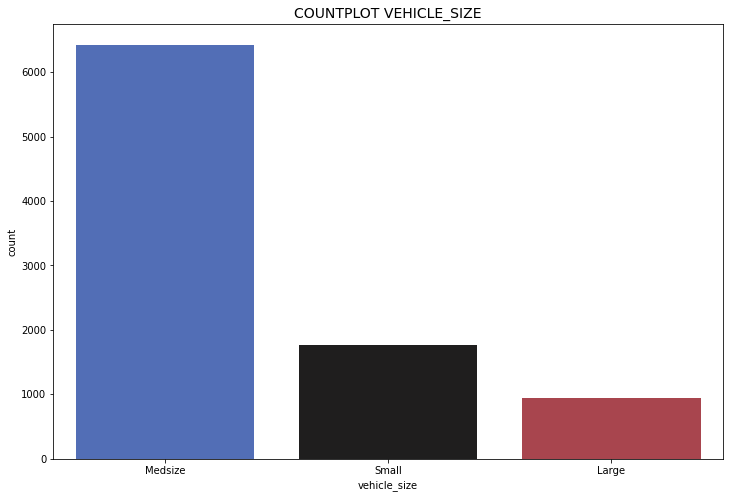

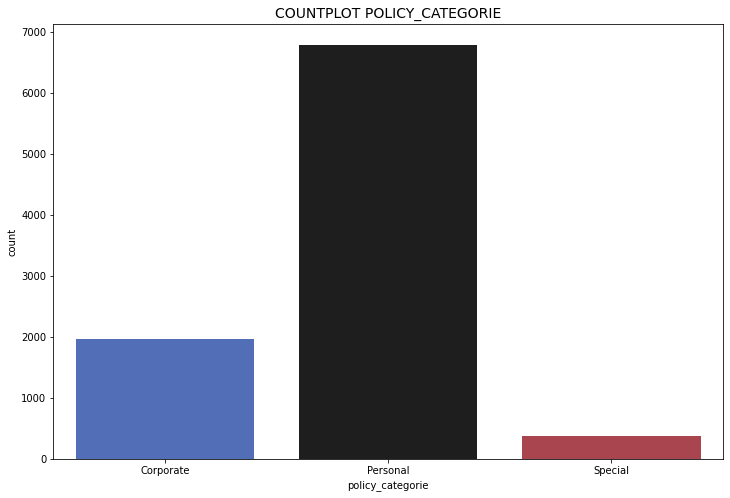

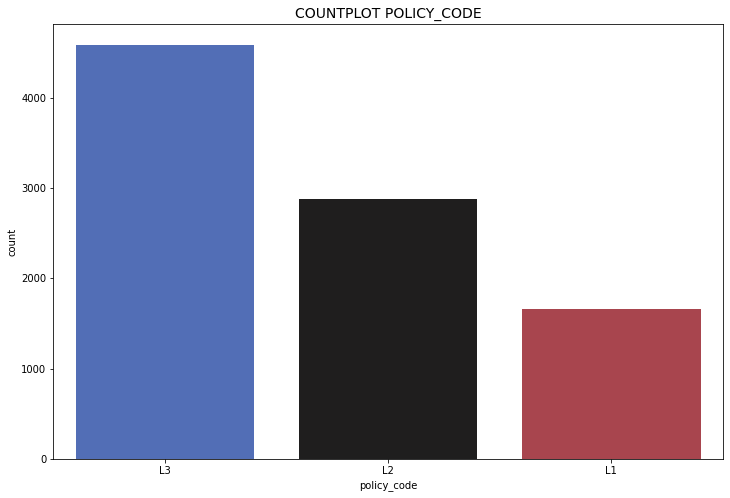

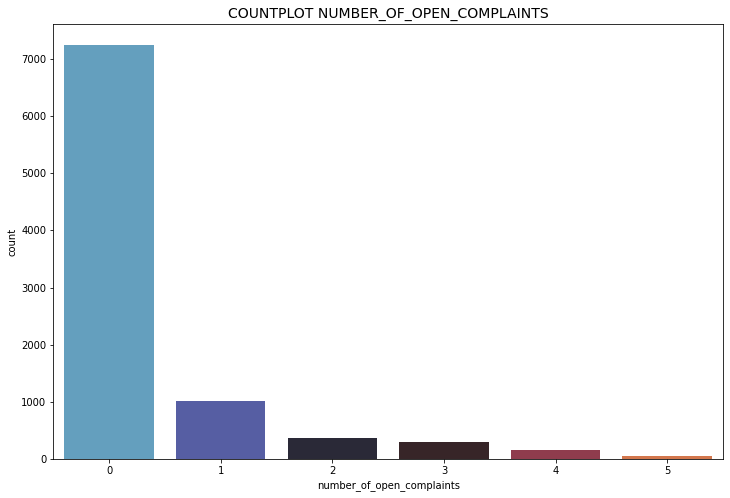

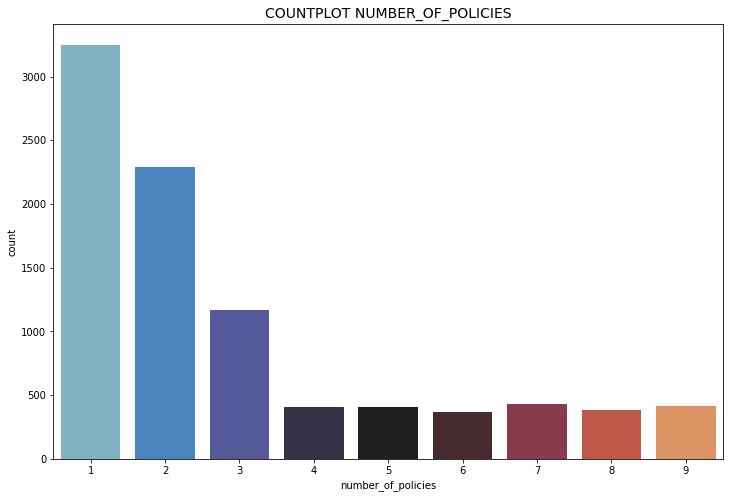

In [16]:
def countplots(dataframe, ignoring_columns):

    for column in dataframe.columns:
        if column not in ignoring_columns:
            fig = plt.figure(figsize = (12, 8))
            sns.countplot(x = column, data = dataframe, palette = 'icefire')
            plt.title(f'COUNTPLOT {column.upper()}', fontsize = 14)
            plt.show()

    return None

countplots(customer_df_categorical_discrete, 'customer')

<h2>PLOTTING THE NUMERICAL FEATURES</h2>

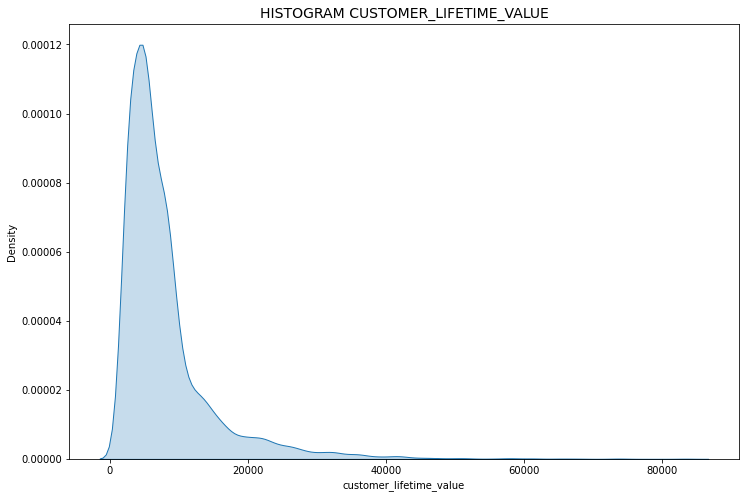

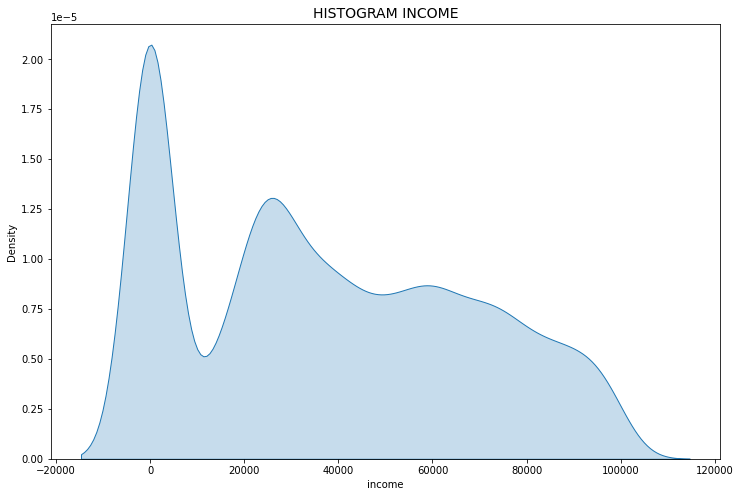

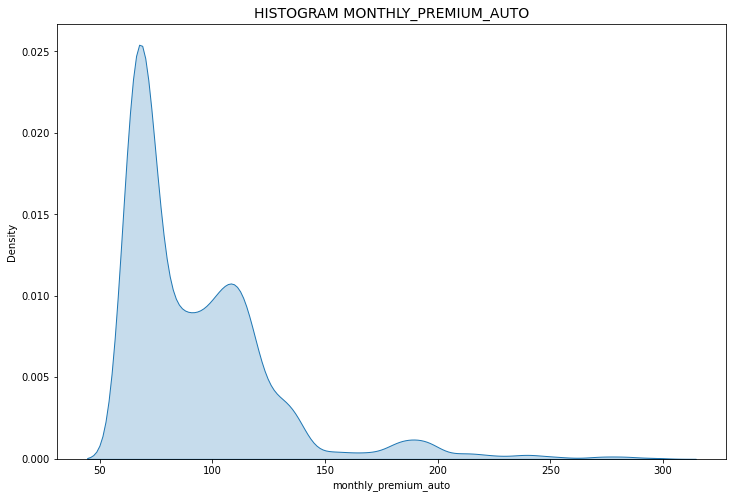

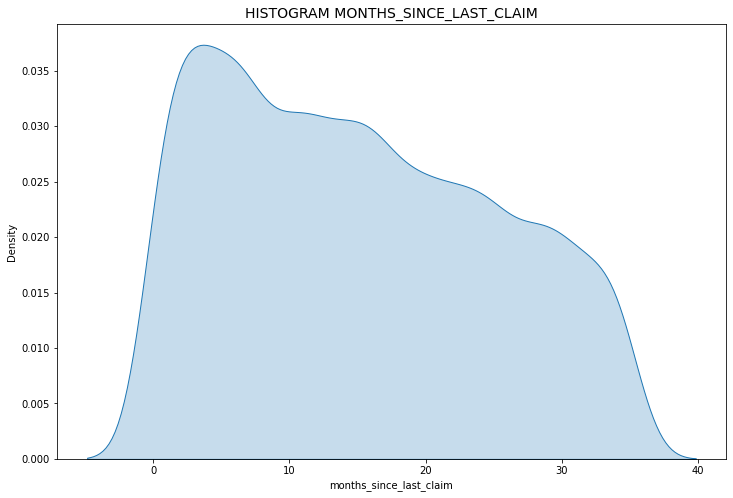

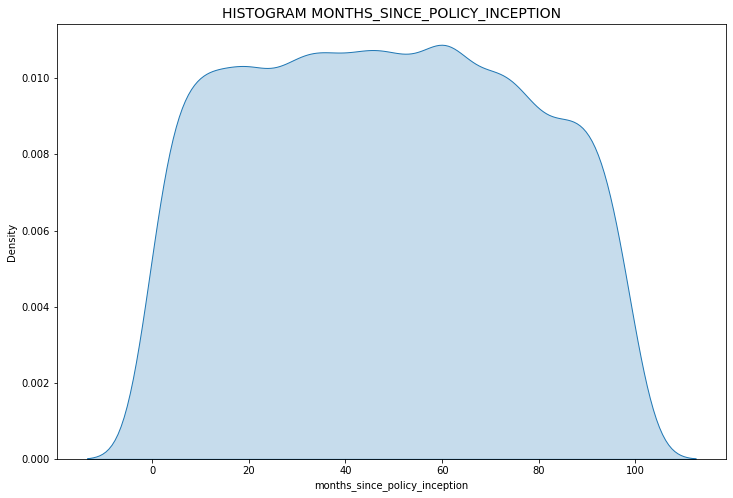

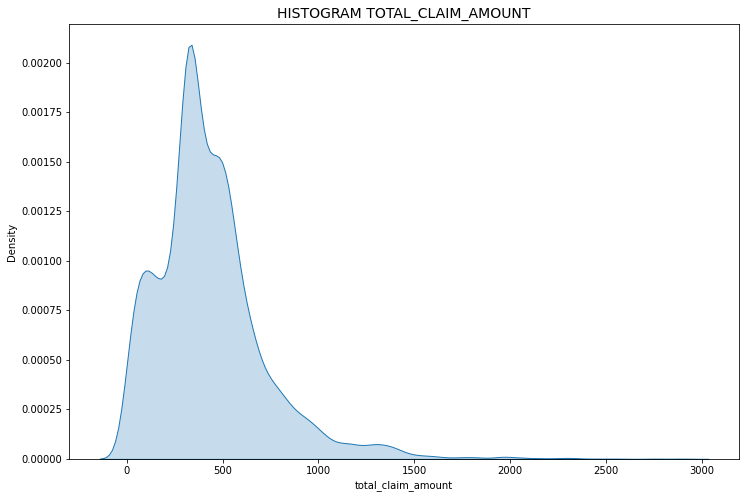

In [17]:
def histograms(dataframe):

    for column in dataframe.columns:
        fig = plt.figure(figsize = (12, 8))
        sns.kdeplot(x = column, data = dataframe, palette = 'icefire', fill = True)
        plt.title(f'HISTOGRAM {column.upper()}',  fontsize = 14)
        plt.show()

    return None

histograms(customer_df_numerical)

<h2>LOOKING FOR OUTLIERS WITH THE BOXPLOTS</h2>

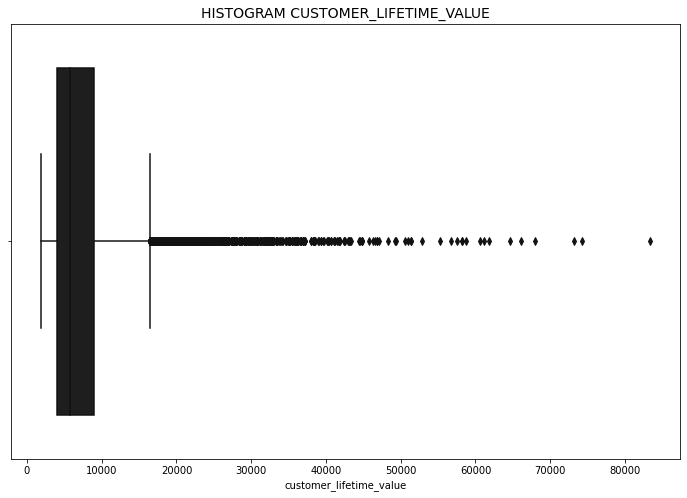

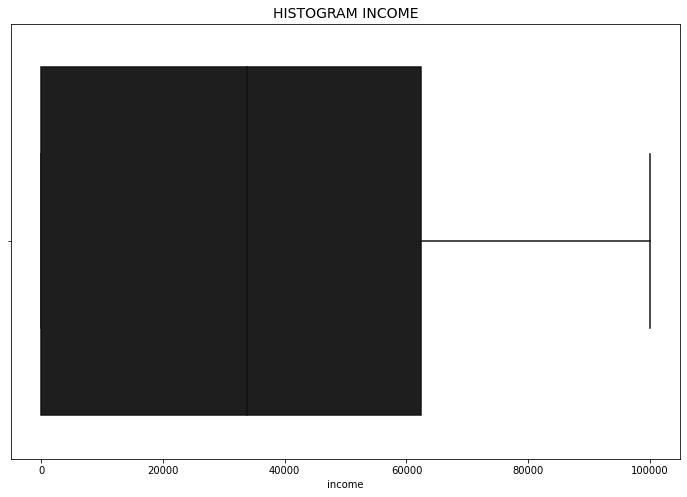

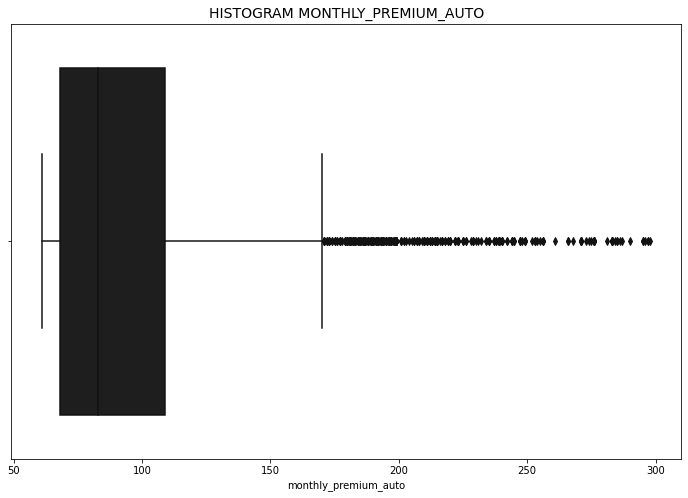

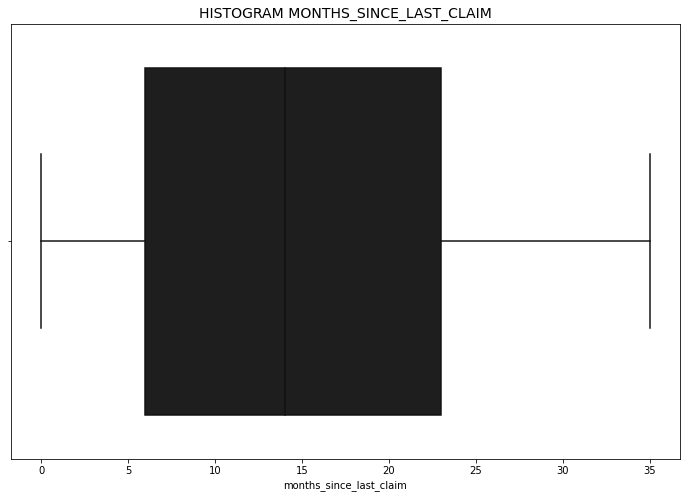

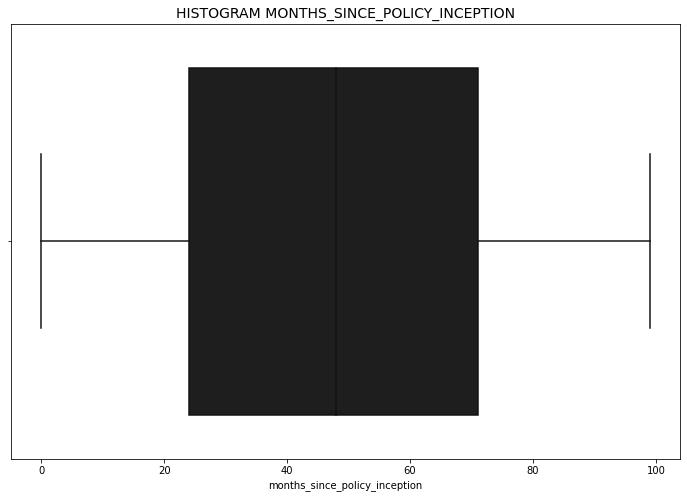

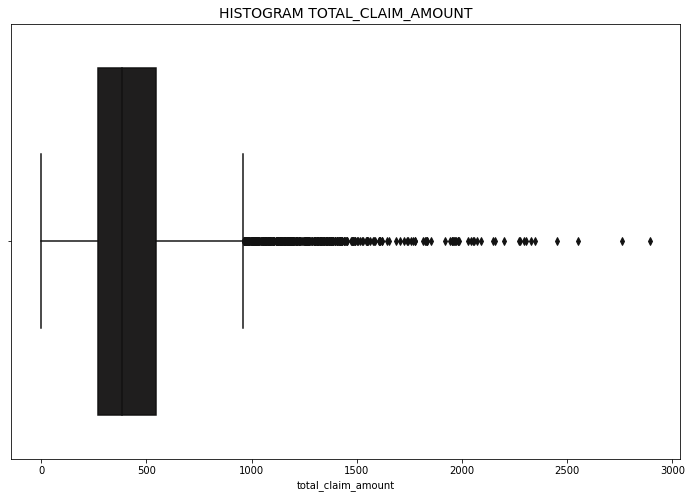

In [18]:
def boxplots(dataframe):

    for column in dataframe.columns:
        fig = plt.figure(figsize = (12, 8))
        sns.boxplot(x = column, data = dataframe, palette = 'icefire')
        plt.title(f'HISTOGRAM {column.upper()}',  fontsize = 14)
        plt.show()

    return None

boxplots(customer_df_numerical)

<h2>APPLYING THE LOG TRANSFORM TO NUMERICAL DATA TO NORMALIZE THE DISTRIBUTIONS AND REDUCE THE EFFECT OF THE OUTLIERS</h2>

In [19]:
def log_transfom(x):

    if np.isfinite(x) and x != 0:
        return np.log(x)
    else:
        return np.NAN

for column in customer_df_numerical.columns:
    customer_df_numerical[column] = customer_df_numerical[column].apply(log_transfom)

<h2>REVIEWING THE DISTRIBUTION OF THE NUMERICAL DATA AFTER LOG TRANSFORM</h2>

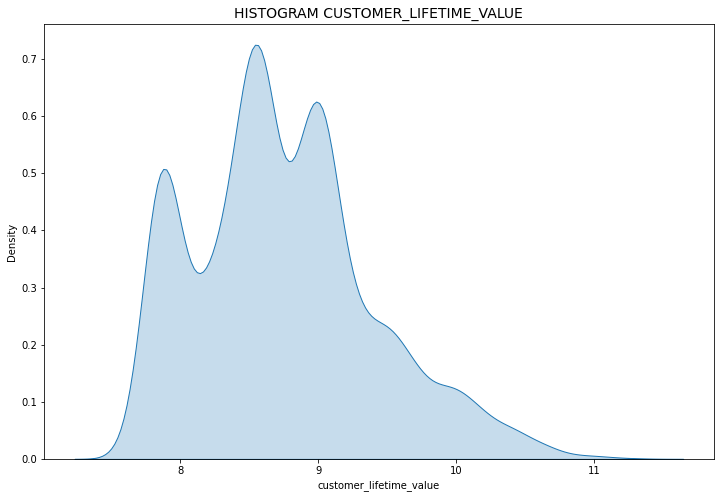

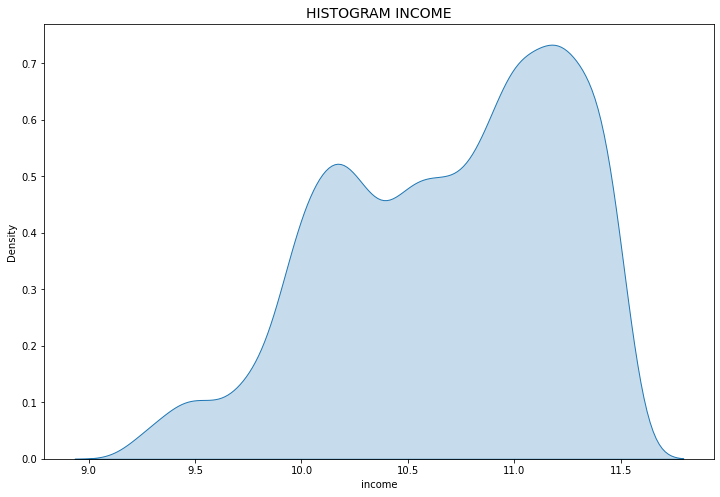

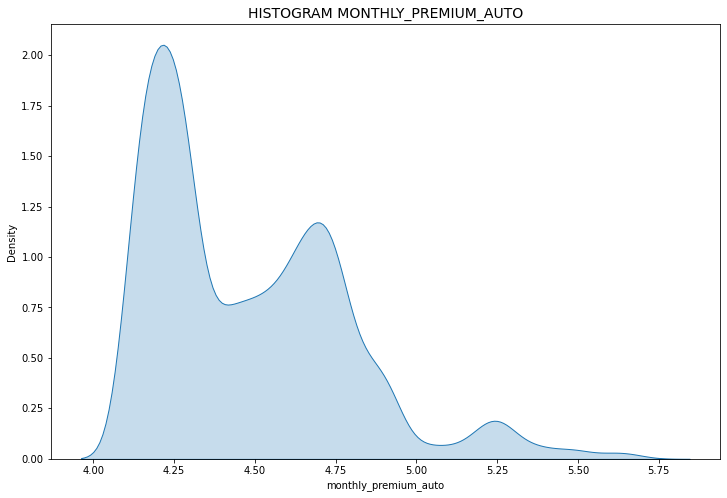

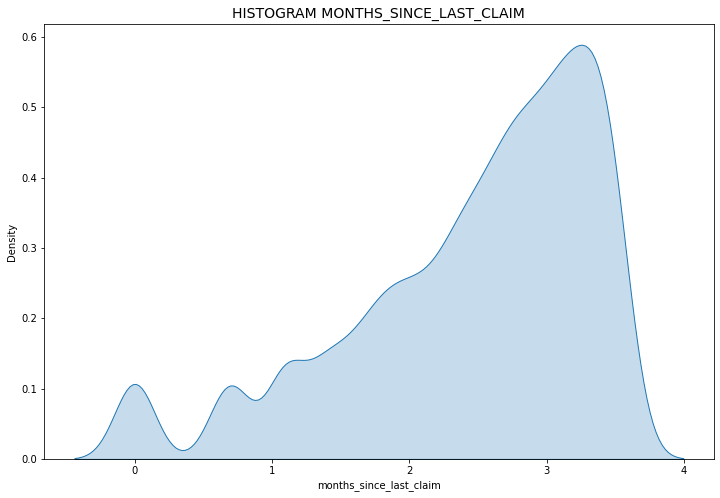

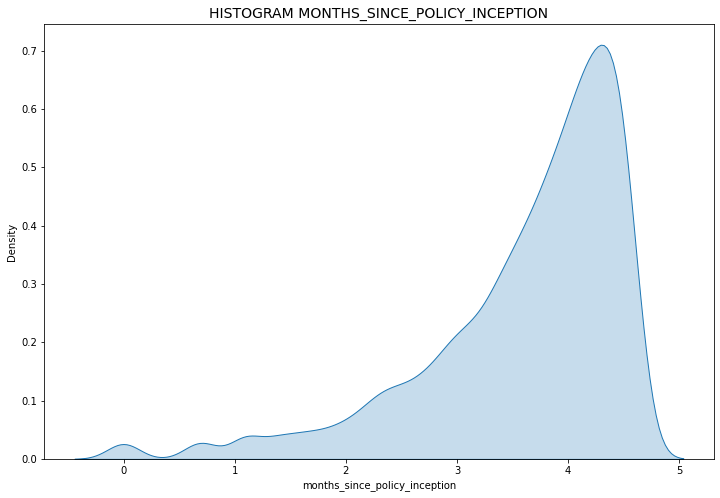

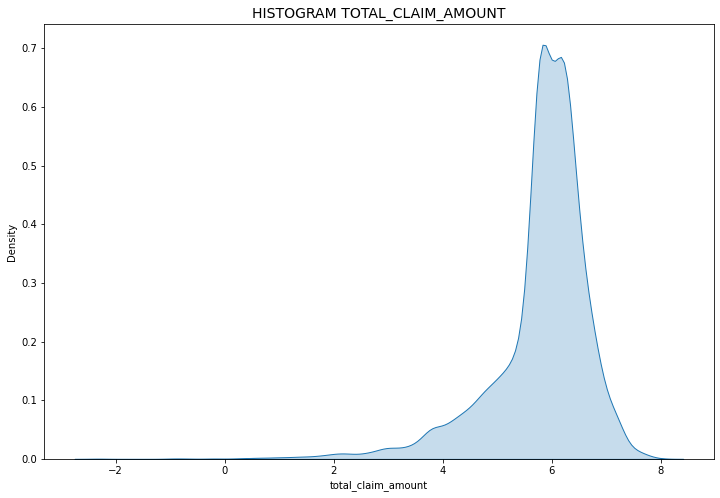

In [20]:
histograms(customer_df_numerical)